In [44]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATASET = "../data/facebook_ads_AT_2019-06-06T14:38:01.257116.json"

### load facebook ads dataset

In [3]:
with open(DATASET) as f:
    data = json.load(f)

### build dataframe

In [127]:
ds = pd.DataFrame(data.values())
ds

,ad_creation_time,ad_creative_body,ad_creative_link_caption,ad_creative_link_title,ad_delivery_start_time,ad_delivery_stop_time,ad_snapshot_url,currency,funding_entity,impressions,page_id,page_name,spend
0,2019-06-04T08:58:39+0000,"Welcome to Porto Santo, an intelligent ecosyst...",NaN,Porto Santo,2019-06-04T09:09:20+0000,2019-06-11T20:00:00+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,NaN,"{'lower_bound': '10000', 'upper_bound': '49999'}",125187578005,Groupe Renault | Electric,"{'lower_bound': '0', 'upper_bound': '99'}"
1,2019-06-04T08:58:41+0000,"Welcome to Porto Santo, an intelligent ecosyst...",NaN,Porto Santo,2019-06-04T09:09:22+0000,2019-06-11T20:00:00+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,NaN,"{'lower_bound': '10000', 'upper_bound': '49999'}",125187578005,Groupe Renault | Electric,"{'lower_bound': '0', 'upper_bound': '99'}"
2,2019-06-04T08:58:36+0000,"Welcome to Porto Santo, an intelligent ecosyst...",NaN,Porto Santo,2019-06-04T09:09:21+0000,2019-06-11T20:00:00+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,NaN,"{'lower_bound': '10000', 'upper_bound': '49999'}",125187578005,Groupe Renault | Electric,"{'lower_bound': '0', 'upper_bound': '99'}"
3,2019-06-06T10:42:58+0000,Hi. Ich bin Daniela und kämpfe im Parlament fü...,www.facebook.com,Daniela,2019-06-06T10:42:58+0000,2019-06-28T17:29:56+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,NR KLUB JETZT,"{'lower_bound': '0', 'upper_bound': '999'}",510291985696801,Daniela Holzinger-Vogtenhuber,"{'lower_bound': '0', 'upper_bound': '99'}"
4,2019-06-06T09:09:21+0000,Die Grüne Radwerkstatt ist für dich da. 🚴🚴\n\n...,Grüne Radwerkstatt,Grüne Radwerkstatt,2019-06-06T09:09:23+0000,2019-06-27T16:30:00+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,Die Innsbrucker Grünen,"{'lower_bound': '0', 'upper_bound': '999'}",185943534768550,Die Innsbrucker Grünen,"{'lower_bound': '0', 'upper_bound': '99'}"
5,2019-06-06T09:07:49+0000,Gestern in der Wilhelminenstraße sagt jemand z...,NaN,NaN,2019-06-06T09:07:51+0000,2019-06-09T09:07:49+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,Nurten Yilmaz,"{'lower_bound': '0', 'upper_bound': '999'}",160128484173405,Nurten Yilmaz,"{'lower_bound': '0', 'upper_bound': '99'}"
6,2019-06-06T09:00:39+0000,Ich gratuliere der Parteichefin Mette Frederik...,NaN,NaN,2019-06-06T09:00:39+0000,2019-06-09T08:58:44+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,SPÖ-Parlamentsklub,"{'lower_bound': '0', 'upper_bound': '999'}",1673371229636129,Pamela Rendi-Wagner,"{'lower_bound': '0', 'upper_bound': '99'}"
7,2019-06-06T07:18:59+0000,Georg Dornauer im Hangar 7\n6. Juni / 22.15 Uh...,servus.com,Talk im Hangar-7 - Freies Spiel statt Koalitio...,2019-06-06T08:00:45+0000,2019-06-06T20:00:45+0000,https://www.facebook.com/ads/archive/render_ad...,EUR,SPÖ Tirol,"{'lower_bound': '1000', 'upper_bound': '4999'}",172040642860223,Die neue SPÖ Tirol,"{'lower_bound': '0', 'upper_bound': '99'}"
8,2019-06-06T07:16:50+0000,WOW: EIN TOLLER UND WICHTIGER BERICHT! Das Mas...,NaN,NaN,2019-06-06T07:46:00+0000,NaN,https://www.facebook.com/ads/archive/render_ad...,EUR,Tierschutzvolksbegehren,"{'lower_bound': '0', 'upper_bound': '999'}",1642678769161065,Tierschutzvolksbegehren,"{'lower_bound': '0', 'upper_bound': '99'}"
9,2019-06-06T07:16:15+0000,WOW: EIN TOLLER UND WICHTIGER BERICHT! Das Mas...,NaN,NaN,2019-06-06T07:46:00+0000,NaN,https://www.facebook.com/ads/archive/render_ad...,EUR,Tierschutzvolksbegehren,"{'lower_bound': '0', 'upper_bound': '999'}",1642678769161065,Tierschutzvolksbegehren,"{'lower_bound': '0', 'upper_bound': '99'}"


In [128]:
# start time and end time -> datetime format
ds['ad_delivery_start_time'] = pd.to_datetime(ds['ad_delivery_start_time'])
ds['ad_delivery_stop_time'] = pd.to_datetime(ds['ad_delivery_stop_time'])
ds['len'] = ds['ad_delivery_stop_time'] - ds['ad_delivery_start_time']

In [129]:
# build dataframes for specific pages
hc = ds[ds['page_name']=="HC Strache"]
kickl = ds[ds['page_name']=="Herbert Kickl"]
vil = ds[ds['page_name']=="Harald Vilimsky"]
hofer = ds[ds['page_name']=="Norbert Hofer"]
fpoe = ds[ds['page_name']=="FPÖ"]

In [130]:
# bulid dataframe for visualisation
vis = pd.DataFrame()
vis['all'] = ds["ad_delivery_start_time"].groupby(ds["ad_delivery_start_time"].dt.week).count()
vis['Hofer'] = hofer["ad_delivery_start_time"].groupby(hofer["ad_delivery_start_time"].dt.week).count()
vis['FPÖ'] = fpoe["ad_delivery_start_time"].groupby(fpoe["ad_delivery_start_time"].dt.week).count()
vis['Strache'] = hc["ad_delivery_start_time"].groupby(hc["ad_delivery_start_time"].dt.week).count()
vis['Kickl'] = kickl["ad_delivery_start_time"].groupby(kickl["ad_delivery_start_time"].dt.week).count()
vis['Vilimsky'] = vil["ad_delivery_start_time"].groupby(vil["ad_delivery_start_time"].dt.week).count()

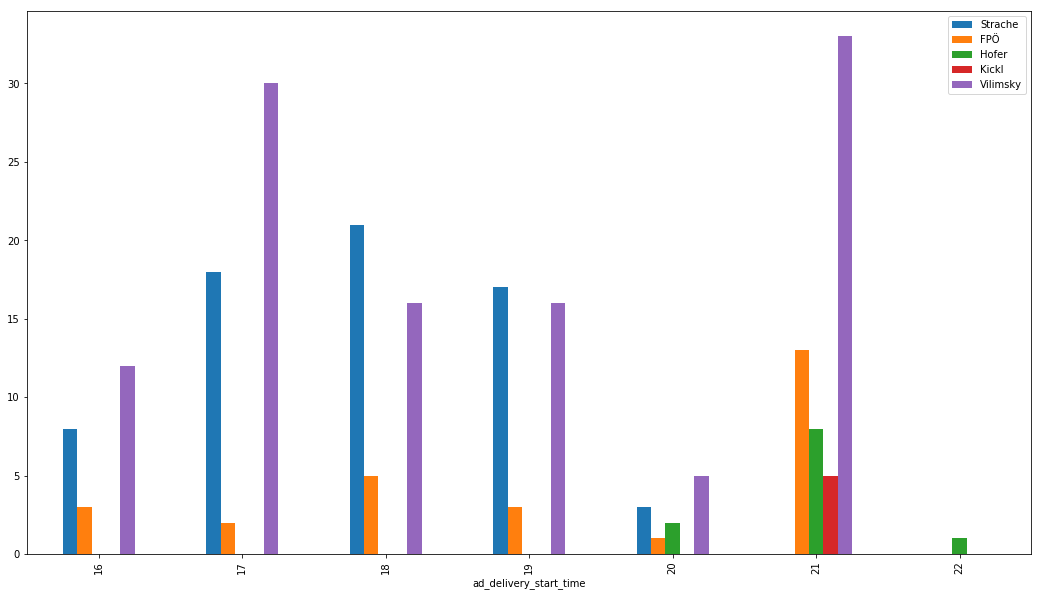

In [132]:
vis[['Strache', 'FPÖ', 'Hofer', 'Kickl', 'Vilimsky']][15:22].plot(kind="bar", figsize=(18,10))